# byCity Dataset Exploration

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Set the current directory
os.chdir('/Users/floriandeters/Desktop/TerraViz - Data Exploration')

In [3]:
# Import the data
bycity = pd.read_csv('GlobalLandTemperaturesByCity.csv', parse_dates=[0])

## Raw Data Exploration

In [4]:
bycity.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
bycity.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [6]:
bycity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


### Insights of first exploration
- There are **7 columns** and **8,599,212 rows** (entries) in the dataset. 

- The dataset contains the **average** temparature for different Cities across the globe, starting from **1743** onwards. 

- Temparature is measured in **degrees celcius**. The mean temparature across all data points is **16.7 degrees**.

- The **minimum** temparature is **-42.3** degrees, the **maximum** temparature **39.5** degrees. There seem to be **no** extreme outlier. However, the maximum temparature appears to be surprisingly low.

- The **date** is of type **datetime** (see import), the **average temparature** and its **uncertainty** are of type **float**, and the rest of type **object**.

- The dataset uses a **significant** amount of **memory** (459.2 MB)

## Closer Look

In [7]:
# How many years do we have data for?
print(f'The dataset entails data for {len(bycity.dt.dt.year.unique())} years.')

The dataset entails data for 271 years.


In [8]:
# How many different citites do we have?
cities = bycity.City.unique()
print(f'Data is available for {len(cities)} cities.')

Data is available for 3448 cities.


In [9]:
# How many different countries do we have?
countries = bycity.Country.unique()
print(f'We have data for {len(countries)} different countries.')

We have data for 159 different countries.


In [10]:
# How many cities per country do we have?
countries_cities = bycity[['City', 'Country']]
countries_cities = countries_cities.drop_duplicates()
co_ci = countries_cities.groupby('Country').count()
print(co_ci)

             City
Country          
Afghanistan     8
Albania         3
Algeria         5
Angola          6
Argentina      32
...           ...
Venezuela      40
Vietnam        30
Yemen           2
Zambia          8
Zimbabwe        7

[159 rows x 1 columns]


In [11]:
# Take a closer look here...
co_ci.describe()

,City
count,159.000000
mean,21.949686
std,54.477123
min,1.000000
25%,2.000000
50%,5.000000
75%,14.500000
max,391.000000


The mean number of cities per country is 21.95. At the max, we have data for 391 cities in a country, which is in fact the case for **India**. For some countries we only have data for 1 city, which is true for a total of **36 cities**.

## Missing Values

In [12]:
# How many rows with NaN values do we have?
print(bycity.isnull().sum())

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


We have **364,130** rows with missing values.

In [13]:
print(f'This equals to {round(bycity.isnull().sum().max()/len(bycity.dt)*100,2)}% of the data.')

This equals to 4.23% of the data.


### Missing values per year

/Users/floriandeters/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


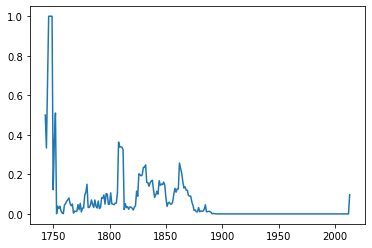

In [14]:
# Which years is the data missing for? And how much is missing each year?

# Extract the rows containing missing values
nandata = bycity[bycity.isna().any(axis=1)]

# Add a Year column to the dataframe
nandata['Year'] = nandata.loc[:,'dt'].dt.year

# Count how many data points are missing each year
yearsmissing = nandata.groupby('Year').count()
yearsmissing = yearsmissing.drop(columns=yearsmissing.columns[[0,1,2,3,4,5]], axis=1)
yearsmissing.columns = ['Missing Values']

# Calculate the total number of datapoints available for each year
bycity['Year'] = bycity.loc[:,'dt'].dt.year
yearscount = bycity.groupby('Year').count()
yearscount = yearscount.drop(columns=yearscount.columns[[0,1,2,3,4,5]], axis=1)
yearscount.columns = ['Total Values']

# Merge both informations into one dataframe
years = yearscount.merge(yearsmissing, how='left', left_on='Year', right_on='Year')

# Fill missing values and calculate the percentage missing for each year
years.fillna(0, inplace=True)
years['Percentage Missing'] = years['Missing Values'] / years['Total Values']

# Show a plot of the percentage missing
plt.plot(years['Percentage Missing'])
plt.show()

In [15]:
print(f'Data is missing for a total of {len(nandata.Year.unique())} years.')

Data is missing for a total of 153 years.


### Insights
- Data is missing especially in the beginnning. Between 1745 and 1749 **100%** of the data is missing.

- The twentieth century is fully complete. In 2013, **9.7%** of the data is missing.

- For the visualization, data before 1750 should be dropped, as it is fully incomplete.

### Missing values per city

In [16]:
# Perform similar calculations for the cities...
citiesmissing = nandata.groupby('City').count()
citiesmissing = citiesmissing.drop(columns=citiesmissing.columns[[0,1,2,3,4,5]], axis=1)
citiesmissing.columns = ['Missing Values']

citiescount = bycity.groupby('City').count()
citiescount = citiescount.drop(columns=citiescount.columns[[0,1,2,3,4,5]], axis=1)
citiescount.columns = ['Total Values']

cit = citiescount.merge(citiesmissing, how='left', left_on='City', right_on='City')
cit.fillna(0, inplace=True)
cit['Percentage Missing'] = cit['Missing Values'] / cit['Total Values']
cit.sort_values('Percentage Missing', inplace=True, ascending=False)
cit.head(5)

,Total Values,Missing Values,Percentage Missing
City,,,
Saint Denis,2721,1039.0,0.381845
Port Louis,2721,1039.0,0.381845
Fianarantsoa,2721,1036.0,0.380742
Toamasina,2721,958.0,0.352076
Antananarivo,2721,958.0,0.352076


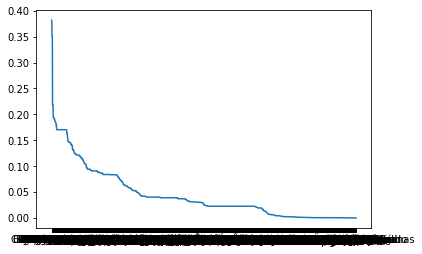

In [17]:
plt.plot(cit['Percentage Missing'])
plt.show()

### Insights
- The largest portion missing for one city is 38.18% -> Still OK, no neccessity to drop them in total.

- For most of the cities, not more than 10% of the data is missing. -> Still OK